In [8]:
import numpy as np
import pickle
from glob import glob
import corner
from mcmc import Ebola

In [23]:
plt.errorbar?

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

In [10]:
par = ('beta', 'k', 'tau', 'sigma', 'gamma', 'f', 'offset',
       'scatter_cases', 'scatter_cases_outlier', 'prob_cases_outlier',
       'scatter_deaths', 'scatter_deaths_outlier', 'prob_deaths_outlier')
ndim = len(par)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
ntemp = 5  # number of parallel-tempered chains
#nburn = 3000  # "burn-in" period to let chains stabilize
nburn = 2000
N = 1000000

In [11]:
e = Ebola(N, 'guinea')

In [12]:
filename = sorted(glob('chain-2019-05-22T15*.pickle'))[-1]
print(filename)

chain-2019-05-22T15:35.pickle


In [13]:
with open(filename, 'rb') as f:
    chain = pickle.load(f)
print(chain.shape)

(5, 50, 6000, 13)


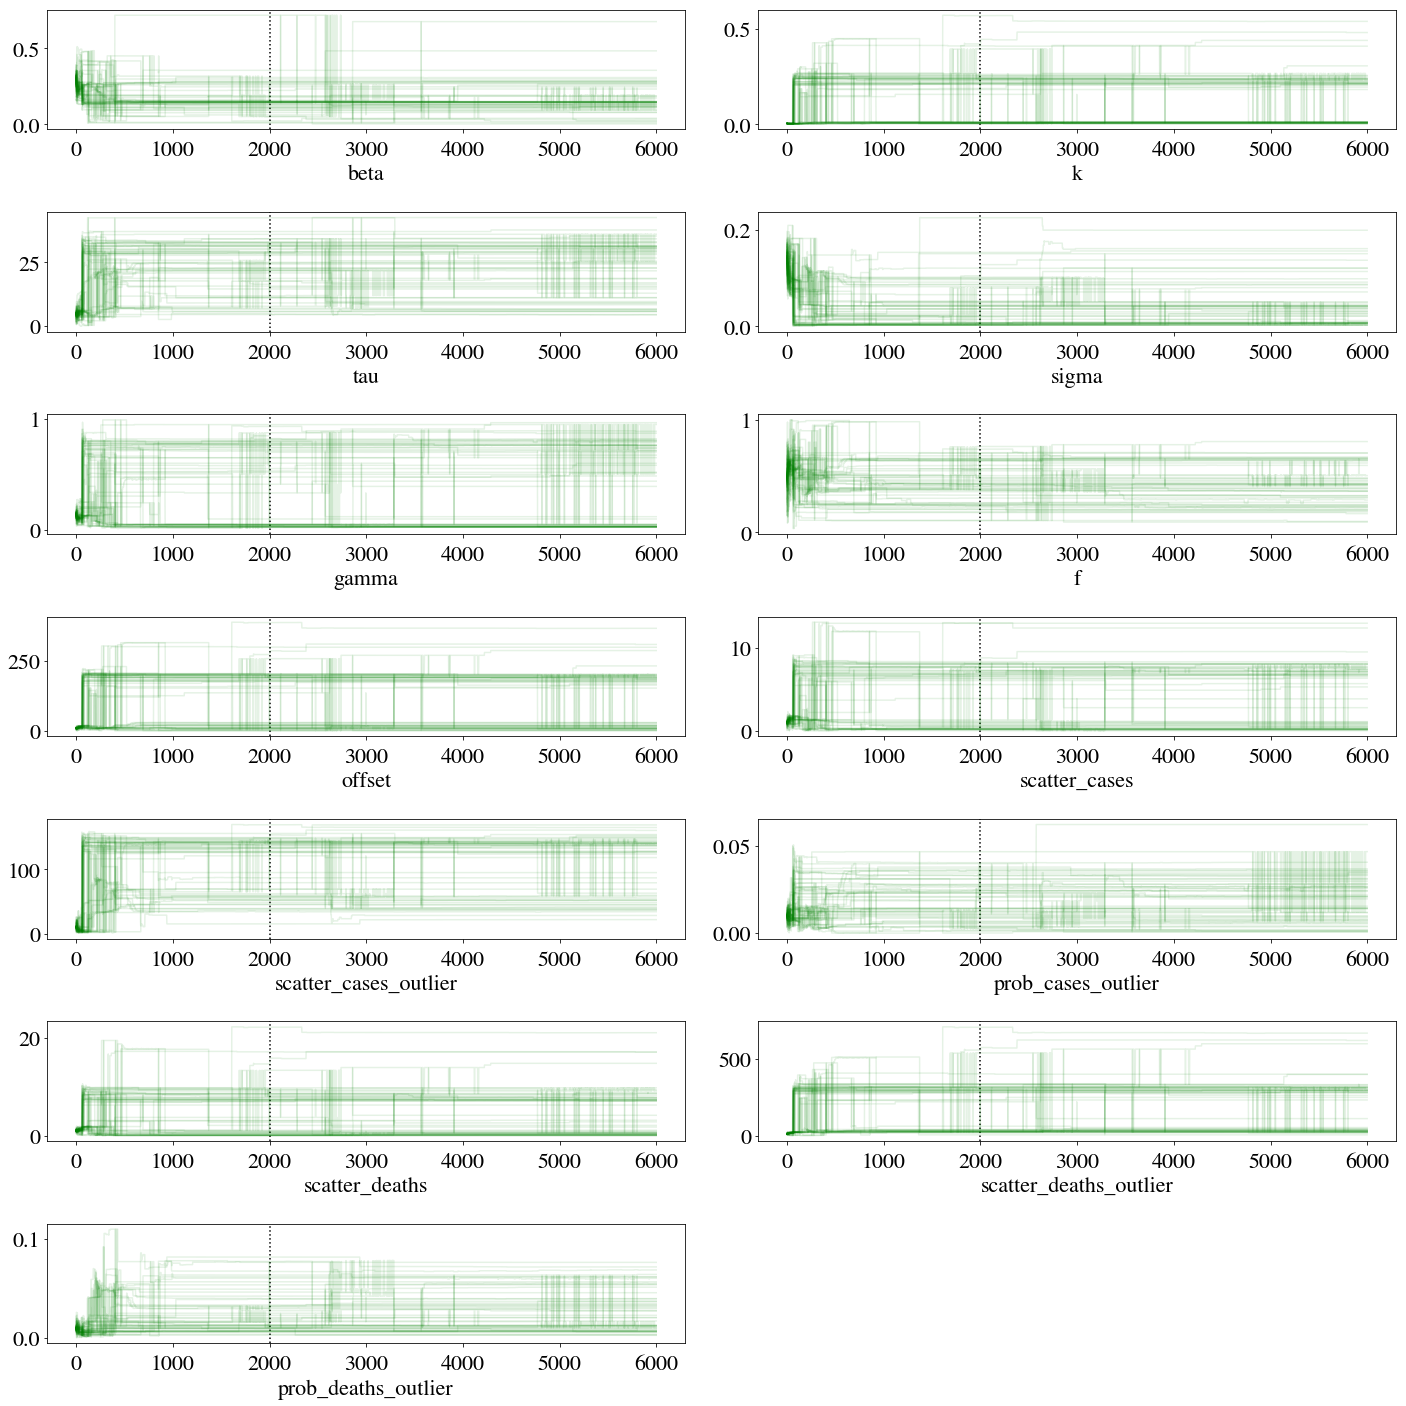

In [14]:
# plot the chains to visually assess convergence
plt.figure(figsize=[20,20])
for i, p in enumerate(par):
    plt.subplot((ndim+1)//2, 2, i+1)
    for w in range(nwalkers):
            #plt.plot(numpy.arange(chain.shape[2]), chain[2,w,:,i], 'r-', alpha=0.1)
            plt.plot(numpy.arange(chain.shape[2]), chain[0,w,:,i], 'g-', alpha=0.1)
    plt.xlabel(p)
    aymin, aymax = plt.ylim()
    plt.vlines(nburn, aymin, aymax, linestyle=':')
    plt.ylim(aymin, aymax)
    plt.tight_layout()

In [15]:
# plot the chains to visually assess auto correlation time at equilibrium
#plt.figure(figsize=[20,20])
#for i, p in enumerate(par):
#    plt.subplot((ndim+1)//2, 2, i+1)
#    for w in range(0,nwalkers,10):
#            plt.plot(numpy.arange(100), chain[2,w,nburn:nburn+100,i], 'r-')
#            plt.plot(numpy.arange(100), chain[0,w,nburn:nburn+100,i], 'g-')
#    plt.xlabel(p)
#    aymin = np.min(chain[0,:,nburn:,i])
#    aymax = np.max(chain[0,:,nburn:nburn+100,i])
#    plt.ylim(aymin, aymax)
#    plt.tight_layout()

In [16]:
def get_samples(c, nburn):
    if c.ndim == 4:
        c = c[0]
    c = c[:, nburn:]
    return c.reshape((np.product(c.shape[:-1]), c.shape[-1]))

In [17]:
samples = get_samples(chain, nburn)

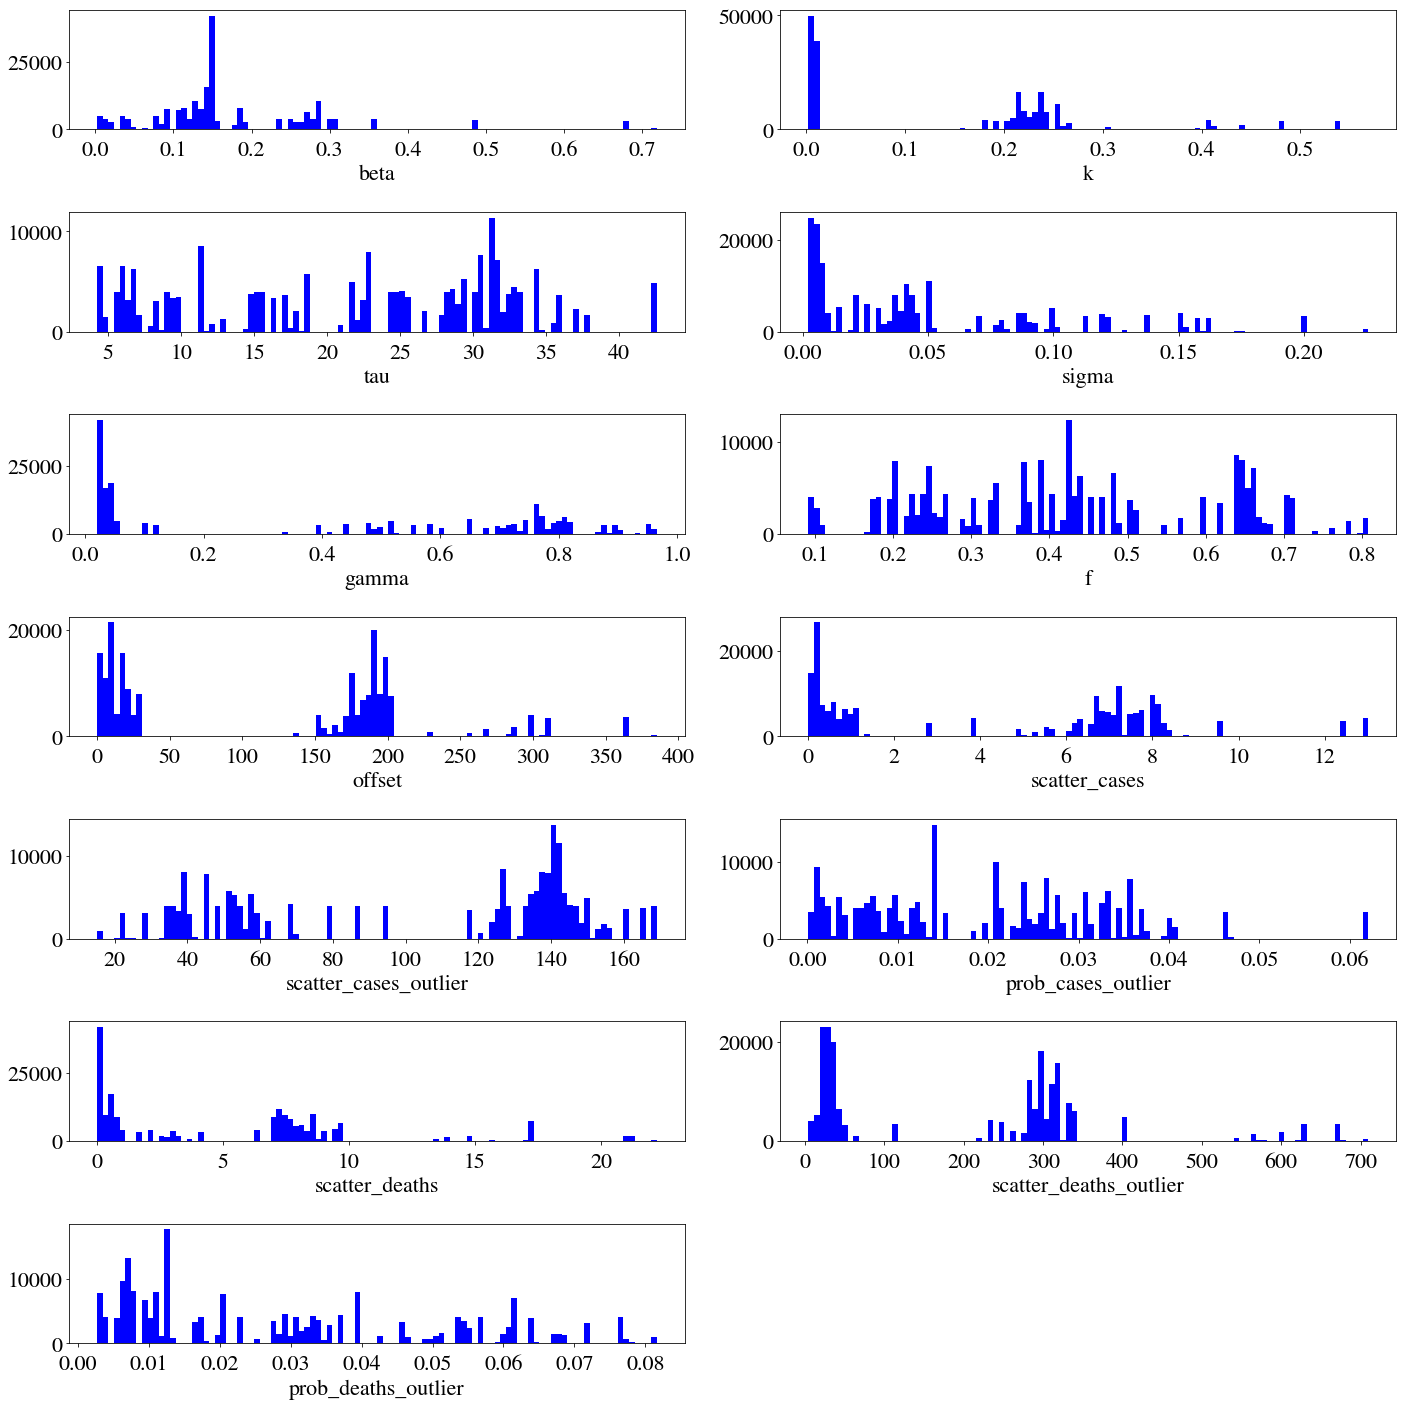

In [18]:
# examine parameter histograms
plt.figure(figsize=[20,20])
for i, p in enumerate(par):
    plt.subplot((ndim+1)//2, 2, i+1)
    n, b, patches = plt.hist(samples[:,i], bins=100, color='b', histtype='stepfilled', log=False)
    plt.xlabel(p)
    plt.tight_layout()

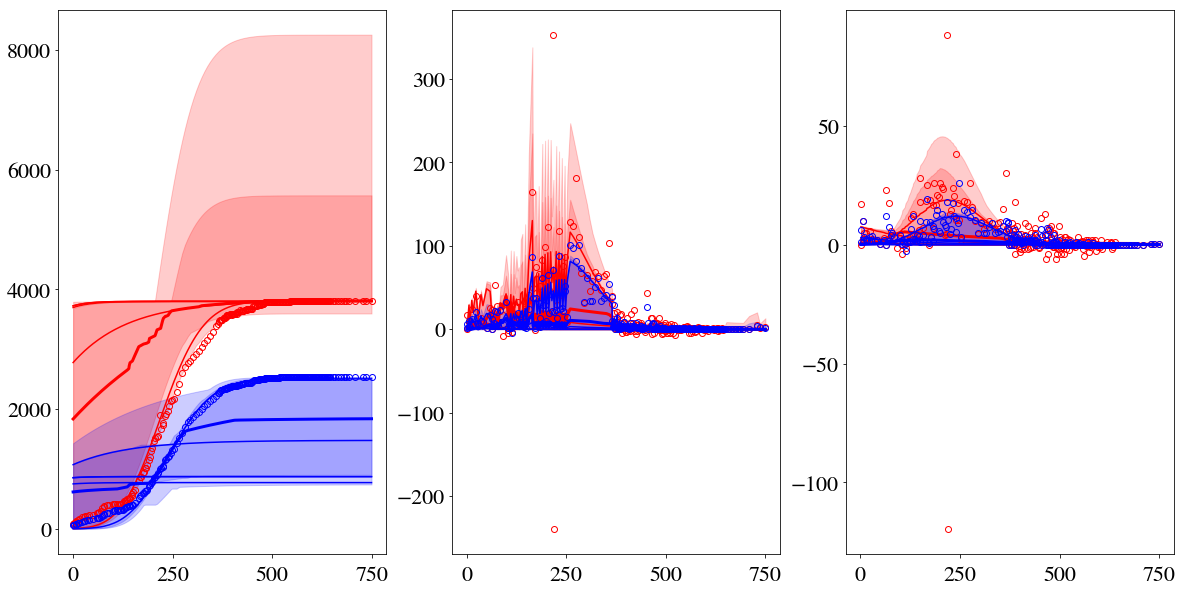

In [19]:
selection = np.random.choice(len(samples), 1000, replace=False)
e.makeplot(samples=samples[selection])

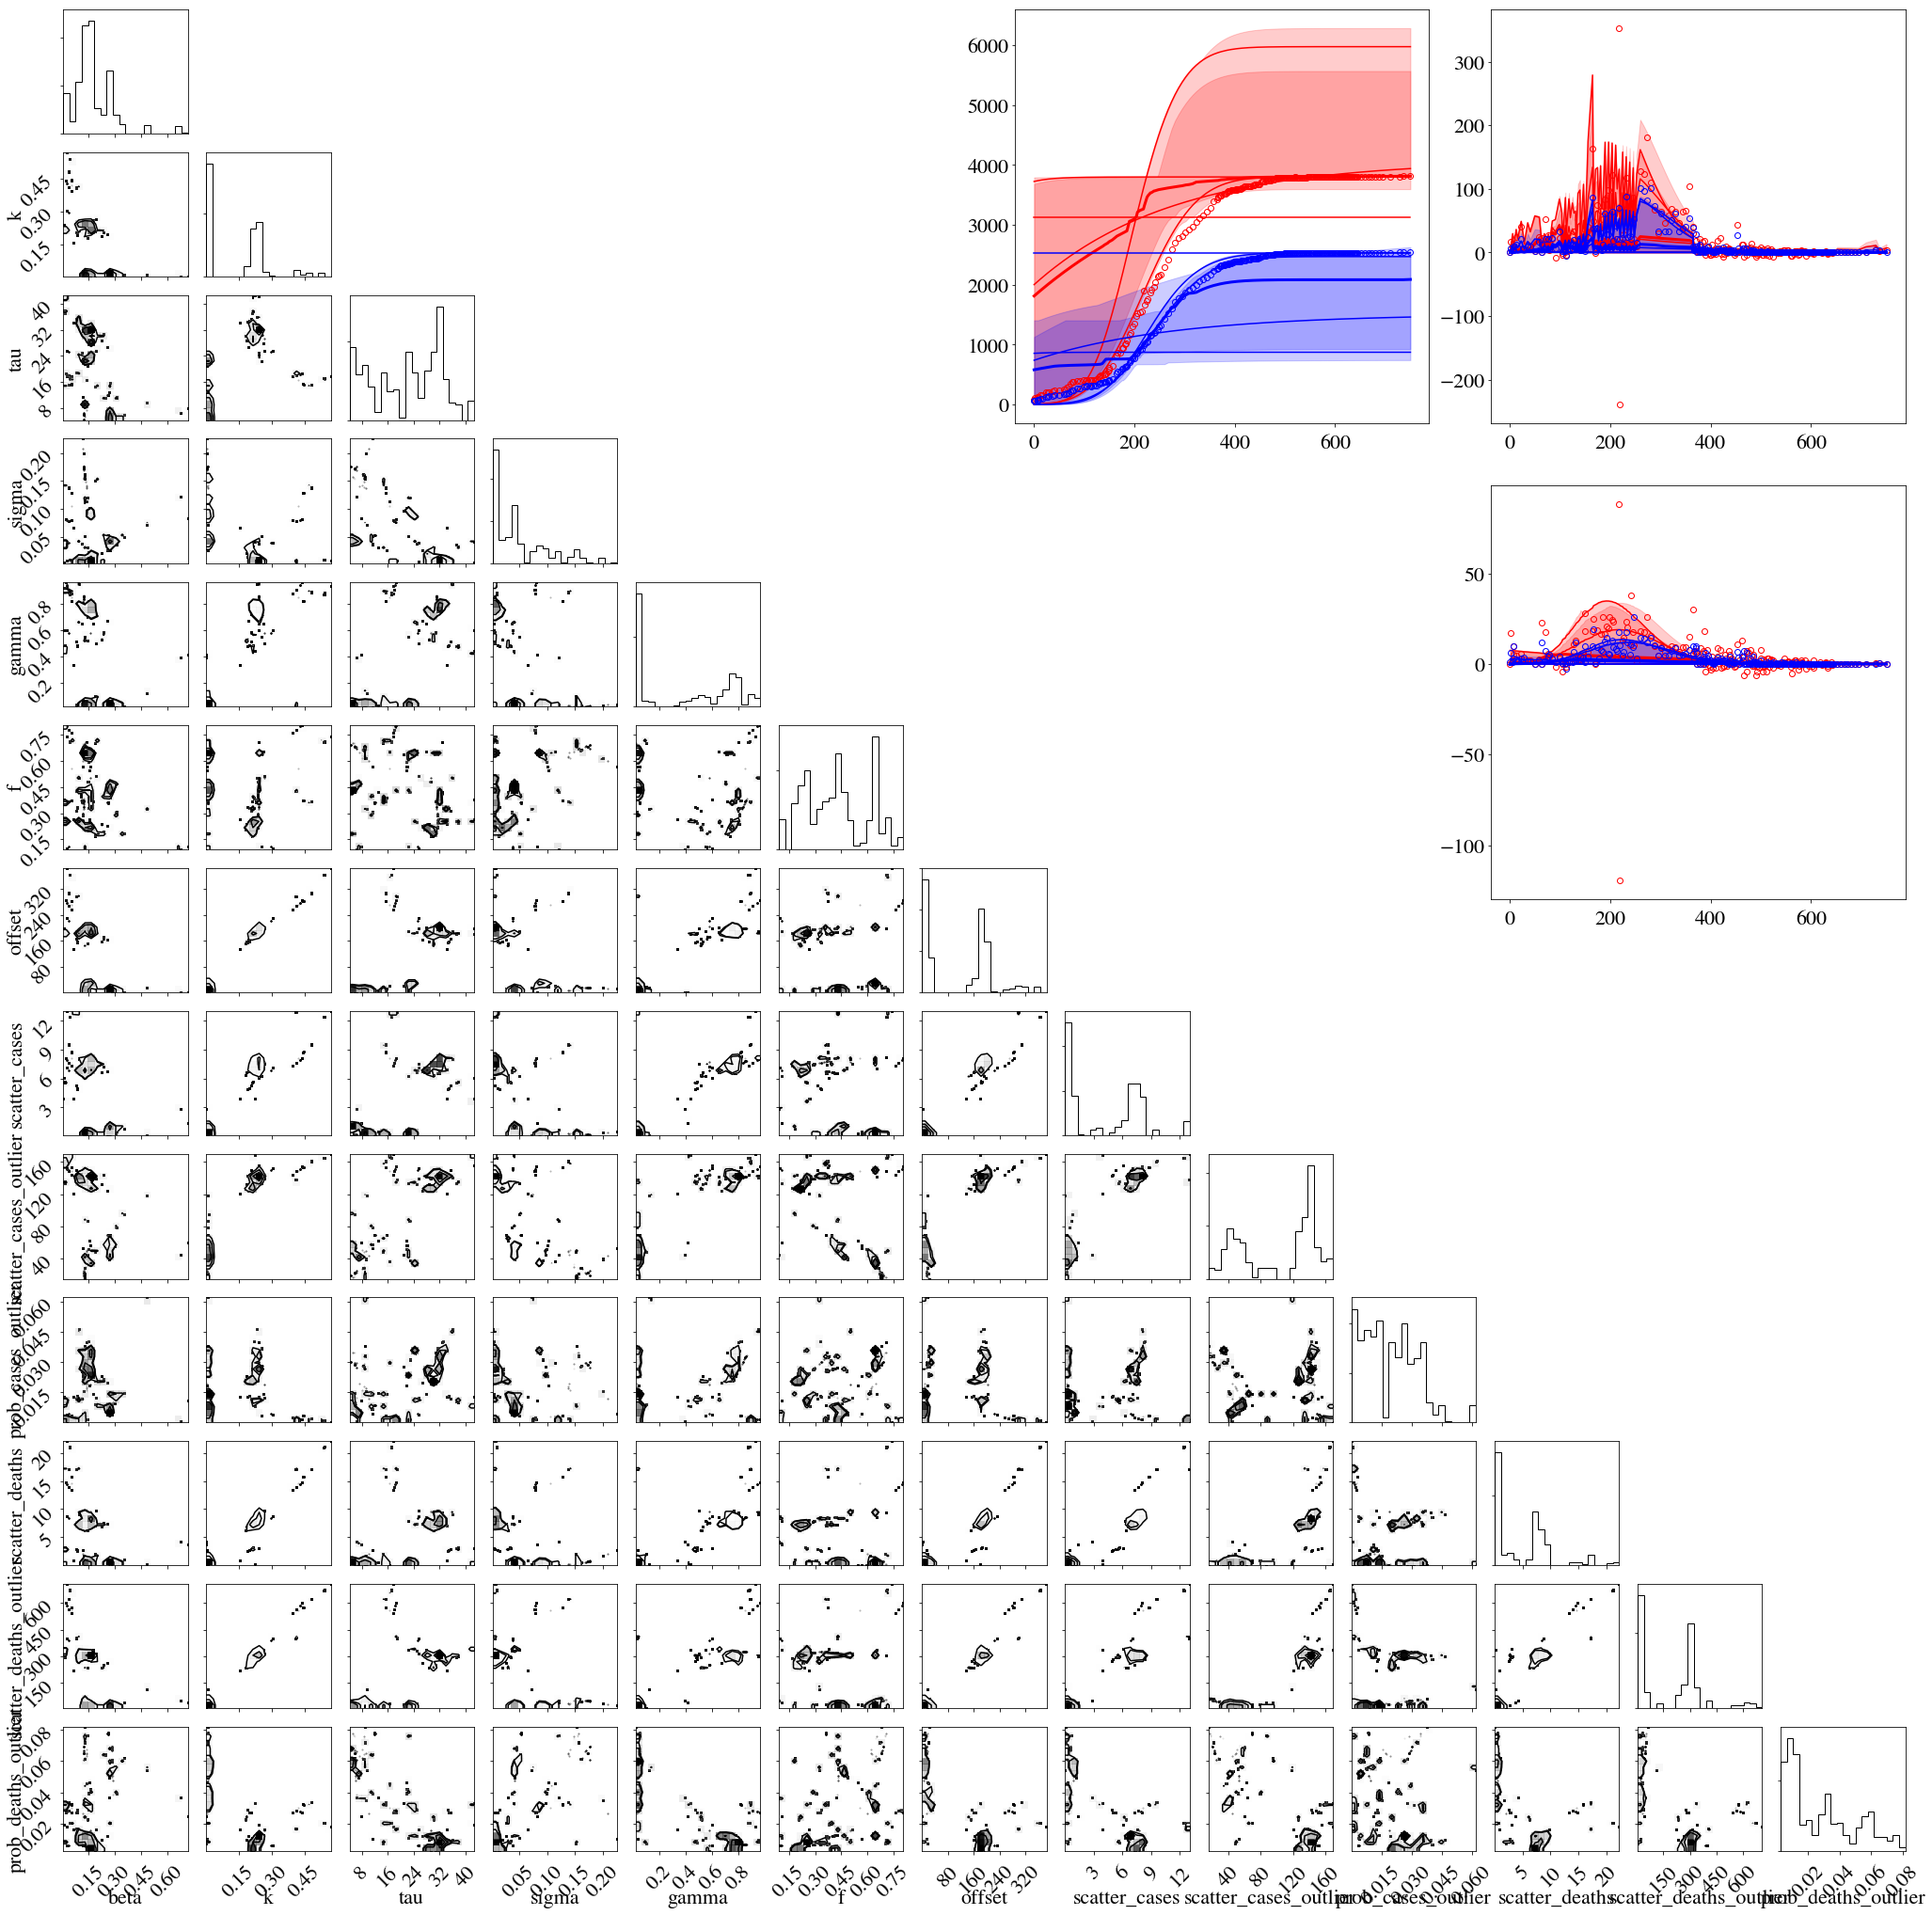

In [20]:
corner.corner(samples, labels=par)
ax0 = plt.subplot(4, 4, 3)
ax1 = plt.subplot(4, 4, 4)
ax2 = plt.subplot(4, 4, 8)
selection = np.random.choice(len(samples), 1000, replace=False)
e.makeplot(samples=samples[selection], ax=(ax0, ax1, ax2))
plt.subplots_adjust(wspace=0.15, hspace=0.15);